In [2]:
from google.colab import files
uploaded = files.upload()

Saving medical_examination.csv to medical_examination.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io

In [4]:
df=pd.read_csv(io.BytesIO(uploaded['medical_examination.csv']))

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
# Add 'overweight' column If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight'] = (df['weight']/pow((df['height']/100),2)).apply(lambda x: 1 if x > 25 else 0)
df['overweight'] 

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [7]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] =df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df.loc[12,'gluc']

0

In [8]:
df['cholesterol']

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64

In [9]:
#Convert the data into long format
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat=pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat.shape

(420000, 3)

In [10]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = pd.DataFrame(df_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
df_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,23055


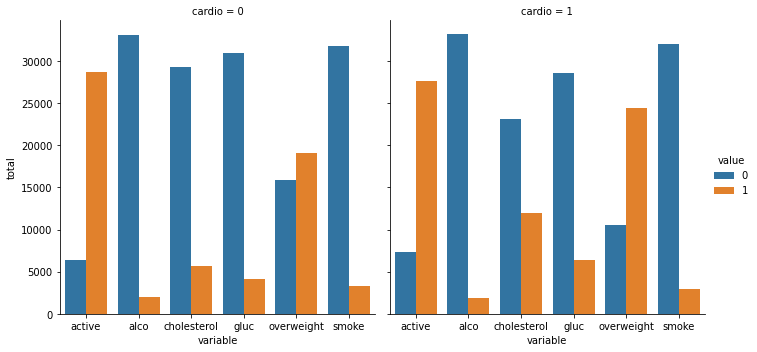

In [11]:
#create a chart that shows the value counts of the categorical features using seaborn's catplot(). 
#The dataset should be split by 'Cardio' so there is one chart for each cardio value.
fig=sns.catplot(x="variable",y="total",data=df_cat,hue="value",kind="bar",col="cardio").fig

In [14]:
#draw heat map

#Clean the data. Filter out the following patient segments that represent incorrect data:
#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile
df_heat=df[(df['ap_lo'] <= df['ap_hi']) &
           (df['height'] >= df['height'].quantile(0.025)) &
           (df['height'] <= df['height'].quantile(0.975)) &
           (df['weight'] >= df['weight'].quantile(0.025)) &
           (df['weight'] <= df['weight'].quantile(0.975))]

In [15]:
#Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). 
corr=df_heat.corr(method="pearson")

In [16]:
#Mask the upper triangle.
mask=np.triu(corr)

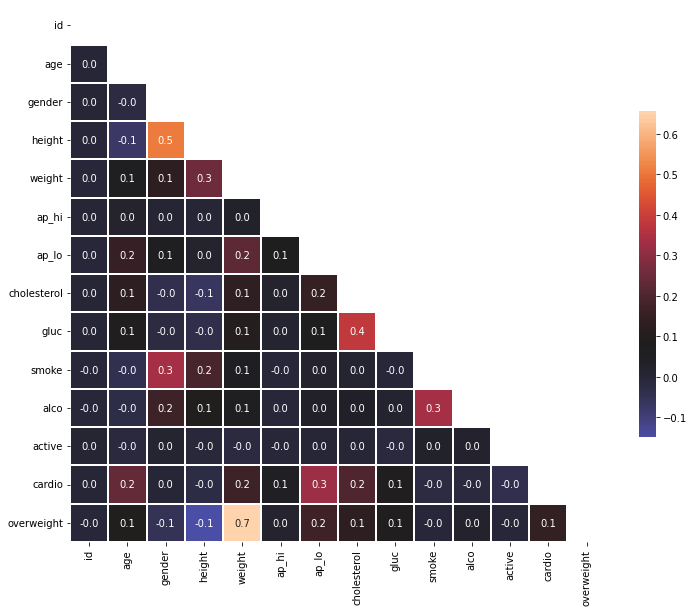

In [25]:
# Set up the matplotlib figure
fig,ax=plt.subplots(figsize=(12,12))
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr,linewidth=1,annot=True,square=True,mask=mask,fmt="0.1f",center=0.08,cbar_kws={"shrink":0.5})